# Tracking User Engagement

Author: Sahngyoon Rhee

By analyzing user engagement data of the given company's eudcational platform, we capture the distribution of the user engagements and also create a simple linear regression model that shows the relationship between user engagement and the number of certificates issued to a user.

## Distribution of Student Engagement

Here, we import the data of student engagement across four different grouops: 

- those who had a free plan in Q2 of 2021
- those who had a free plan Q2 of 2022
- those who had a paid subscription in Q2 of 2021
- those who had a paid subscription in Q2 of 2022

In [1]:
import os

# Get the current directory
current_directory = os.getcwd()

# Get all files in the current directory
files = os.listdir(current_directory)

# Print all files
for file in files:
    print(file)

.ipynb_checkpoints
combine multiple csv files into one workbook macro template.xlsm
combined_minutes_watched.xlsx
data_scientist_project (given SQL file).sql
minutes_and_certificates.csv
minutes_watched_2021_paid_0.csv
minutes_watched_2021_paid_0_no_outliers.csv
minutes_watched_2021_paid_1.csv
minutes_watched_2021_paid_1_no_outliers.csv
minutes_watched_2022_paid_0.csv
minutes_watched_2022_paid_0_no_outliers.csv
minutes_watched_2022_paid_1.csv
minutes_watched_2022_paid_1_no_outliers.csv
SQL Script for User Engagement Project.sql
UserEngagement.ipynb


In [2]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# store data in dataframes
watchtime_and_cert = pd.read_csv("minutes_and_certificates.csv")
watchtime_2021_unpaid = pd.read_csv("minutes_watched_2021_paid_0.csv")
watchtime_2021_paid = pd.read_csv("minutes_watched_2021_paid_1.csv")
watchtime_2022_unpaid = pd.read_csv("minutes_watched_2022_paid_0.csv")
watchtime_2022_paid = pd.read_csv("minutes_watched_2022_paid_1.csv")

# first few rows of each dataframe
# display(watchtime_and_cert.head())
display(watchtime_2021_unpaid.head())
# display(watchtime_2021_paid.head())
# display(watchtime_2022_unpaid.head())
# display(watchtime_2022_paid.head())

,student_id,minutes_watched,paid_in_q2
0,66,0.7167,0
1,132,71.9167,0
2,560,1.3667,0
3,606,18.1167,0
4,615,18.9333,0


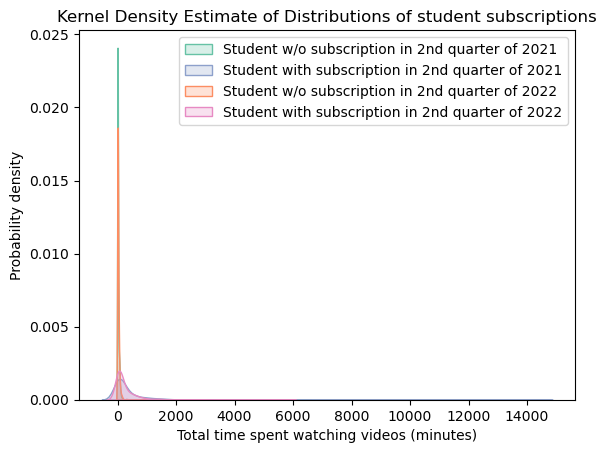

In [4]:
# set up four colors that are distinct from one another
color = sns.color_palette('Set2', 4)

# plot Kernel Density Estimation (KDE)
sns.kdeplot(data = watchtime_2021_unpaid['minutes_watched'],
            color = color[0], fill = True, label = 'Student w/o subscription in 2nd quarter of 2021')
sns.kdeplot(data = watchtime_2021_paid['minutes_watched'],
            color = color[2], fill = True, label = 'Student with subscription in 2nd quarter of 2021')
sns.kdeplot(data = watchtime_2022_unpaid['minutes_watched'],
            color = color[1], fill = True, label = 'Student w/o subscription in 2nd quarter of 2022')
sns.kdeplot(data = watchtime_2022_paid['minutes_watched'],
            color = color[3], fill = True, label = 'Student with subscription in 2nd quarter of 2022')

# Set title, labels, and legend
plt.title('Kernel Density Estimate of Distributions of student subscriptions')
plt.xlabel('Total time spent watching videos (minutes)')
plt.ylabel('Probability density')
plt.legend()

# show plot
plt.show()

As it is, we cannot get a clear view on each of the KDEs. We plot them in two different graphs, one for free plan and another for paid subscription. This wil help us see the changes of each group according to the change of year.

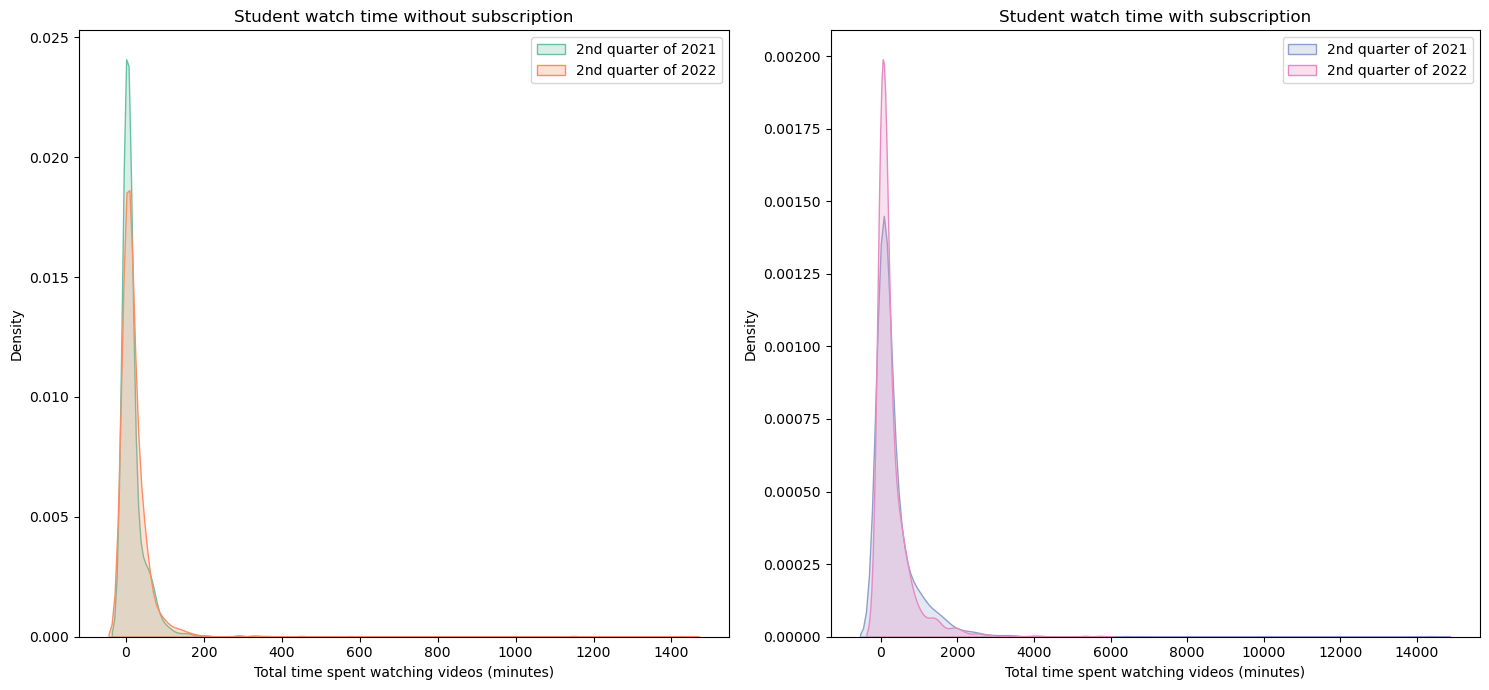

In [5]:
# create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# plot Kernel Density Estimation (KDE) plot to see distribution for unpaid subscriptions
sns.kdeplot(data=watchtime_2021_unpaid['minutes_watched'], color=color[0], fill=True, ax=axs[0])
sns.kdeplot(data=watchtime_2022_unpaid['minutes_watched'], color=color[1], fill=True, ax=axs[0])
axs[0].set_title('Student watch time without subscription')
axs[0].legend(['2nd quarter of 2021', '2nd quarter of 2022'])

# plot Kernel Density Estimation (KDE) plot to see distribution for paid subscriptions
sns.kdeplot(data=watchtime_2021_paid['minutes_watched'], color=color[2], fill=True, ax=axs[1])
sns.kdeplot(data=watchtime_2022_paid['minutes_watched'], color=color[3], fill=True, ax=axs[1])
axs[1].set_title('Student watch time with subscription')
axs[1].legend(['2nd quarter of 2021', '2nd quarter of 2022'])

# set the labels for x and y axes
for ax in axs.flat:
    ax.set(xlabel='Total time spent watching videos (minutes)', ylabel='Density')

# adjust the layout
plt.tight_layout()


From what we see, all four distribution are right skewed. To get a better understanding of the four distributions, we now remove outliers.

In [6]:
# Create new dataframes excluding outliers of minutes_watched variable

# For the watchtime_2021_unpaid dataframe
# Calculate the boundary of 99th percentile
outlier_bound_2021_unpaid = watchtime_2021_unpaid['minutes_watched'].quantile(0.99)
# Create filtering that is set 'True' only for those values less than the boundary above
no_outlier_condition_2021_unpaid = watchtime_2021_unpaid['minutes_watched'] < outlier_bound_2021_unpaid
# create new dataframe excluding top 1% outlier by applying the filtering
watchtime_2021_unpaid_no_outliers = watchtime_2021_unpaid[no_outlier_condition_2021_unpaid]


# Repeat the same procedure for the rest three dataframes
outlier_bound_2021_paid = watchtime_2021_paid['minutes_watched'].quantile(0.99)
no_outlier_condition_2021_paid = watchtime_2021_paid['minutes_watched'] < outlier_bound_2021_paid
watchtime_2021_paid_no_outliers = watchtime_2021_paid[no_outlier_condition_2021_paid]

outlier_bound_2022_unpaid = watchtime_2021_unpaid['minutes_watched'].quantile(0.99)
no_outlier_condition_2022_unpaid = watchtime_2022_unpaid['minutes_watched'] < outlier_bound_2022_unpaid
watchtime_2022_unpaid_no_outliers = watchtime_2022_unpaid[no_outlier_condition_2022_unpaid]

outlier_bound_2022_paid = watchtime_2022_paid['minutes_watched'].quantile(0.99)
no_outlier_condition_2022_paid = watchtime_2022_paid['minutes_watched'] < outlier_bound_2022_paid
watchtime_2022_paid_no_outliers = watchtime_2022_paid[no_outlier_condition_2022_paid]

We now plot the data without outliers.

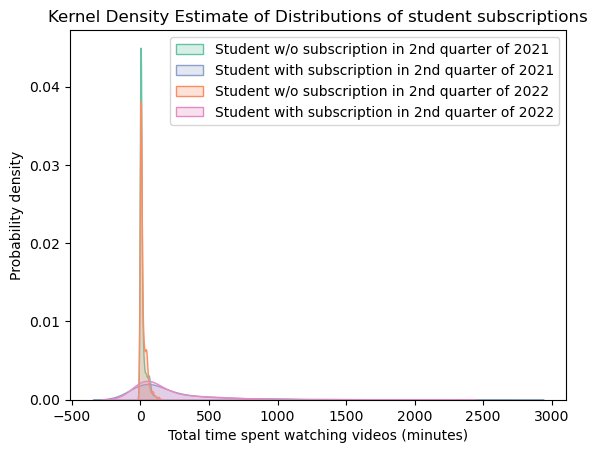

In [7]:
# set up four colors that are distinct from one another
color = sns.color_palette('Set2', 4)

# plot Kernel Density Estimation (KDE)
sns.kdeplot(data = watchtime_2021_unpaid_no_outliers['minutes_watched'],
            color = color[0], fill = True, label = 'Student w/o subscription in 2nd quarter of 2021')
sns.kdeplot(data = watchtime_2021_paid_no_outliers['minutes_watched'],
            color = color[2], fill = True, label = 'Student with subscription in 2nd quarter of 2021')
sns.kdeplot(data = watchtime_2022_unpaid_no_outliers['minutes_watched'],
            color = color[1], fill = True, label = 'Student w/o subscription in 2nd quarter of 2022')
sns.kdeplot(data = watchtime_2022_paid_no_outliers['minutes_watched'],
            color = color[3], fill = True, label = 'Student with subscription in 2nd quarter of 2022')

# Set title, labels, and legend
plt.title('Kernel Density Estimate of Distributions of student subscriptions')
plt.xlabel('Total time spent watching videos (minutes)')
plt.ylabel('Probability density')
plt.legend()

# show plot
plt.show()

As before, we group the distributions according to the year, for better visual analysis. Notice the sizable difference in the y-axes among the four graphs.

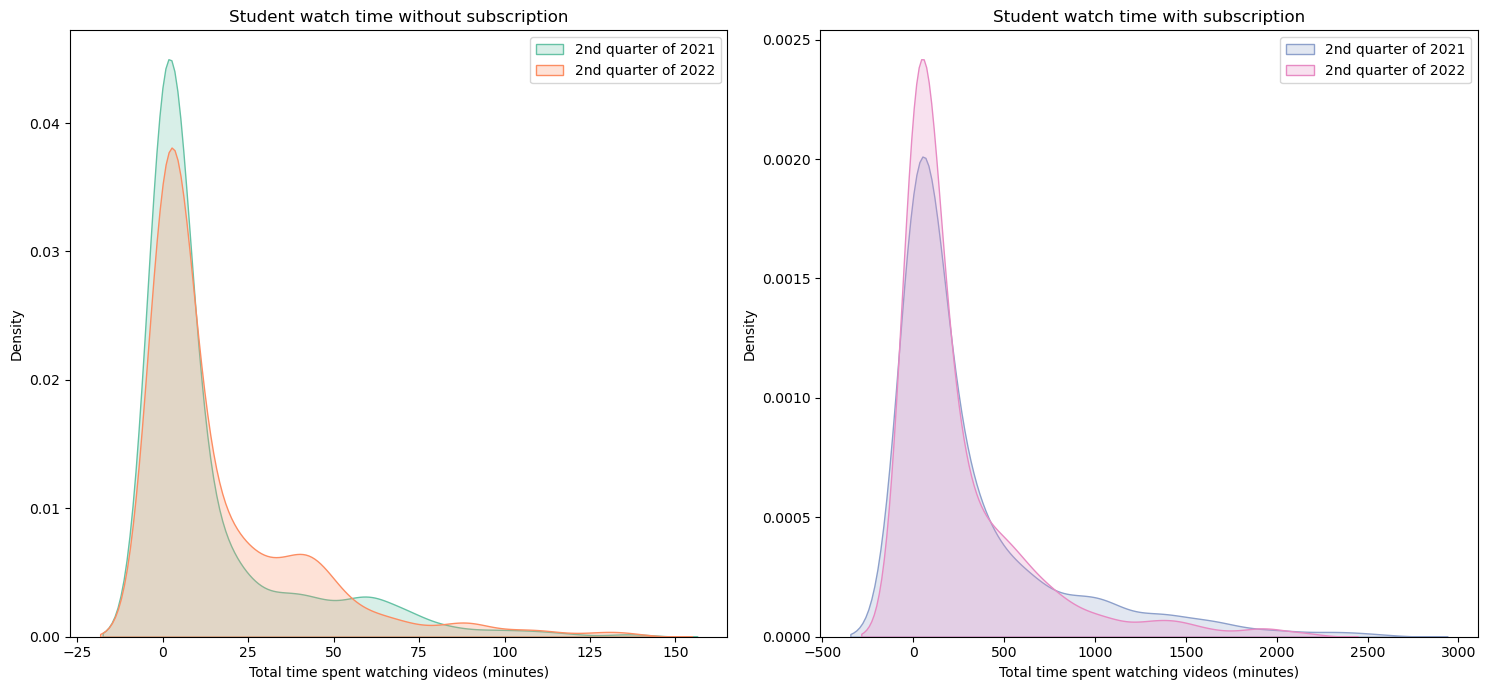

In [8]:
# create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# plot Kernel Density Estimation (KDE) plot to see distribution for unpaid subscriptions
sns.kdeplot(data=watchtime_2021_unpaid_no_outliers['minutes_watched'], color=color[0], fill=True, ax=axs[0])
sns.kdeplot(data=watchtime_2022_unpaid_no_outliers['minutes_watched'], color=color[1], fill=True, ax=axs[0])
axs[0].set_title('Student watch time without subscription')
axs[0].legend(['2nd quarter of 2021', '2nd quarter of 2022'])

# plot Kernel Density Estimation (KDE) plot to see distribution for paid subscriptions
sns.kdeplot(data=watchtime_2021_paid_no_outliers['minutes_watched'], color=color[2], fill=True, ax=axs[1])
sns.kdeplot(data=watchtime_2022_paid_no_outliers['minutes_watched'], color=color[3], fill=True, ax=axs[1])
axs[1].set_title('Student watch time with subscription')
axs[1].legend(['2nd quarter of 2021', '2nd quarter of 2022'])

# set the labels for x and y axes
for ax in axs.flat:
    ax.set(xlabel='Total time spent watching videos (minutes)', ylabel='Density')

# adjust the layout
plt.tight_layout()

We save the four data as CSV files.

In [9]:
# Save the new data without outliers to new CSV files
watchtime_2021_unpaid_no_outliers.to_csv('minutes_watched_2021_paid_0_no_outliers.csv', index=False)
watchtime_2021_paid_no_outliers.to_csv('minutes_watched_2021_paid_1_no_outliers.csv', index=False)
watchtime_2022_unpaid_no_outliers.to_csv('minutes_watched_2022_paid_0_no_outliers.csv', index=False)
watchtime_2022_paid_no_outliers.to_csv('minutes_watched_2022_paid_1_no_outliers.csv', index=False)

## Creating a linear regression model

We now perform a linear regression using the `minutes_watched` column as a predictor and `certificates_issued` as a target. We shall use 20% of our data as a test set.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# import data
raw_data = pd.read_csv("minutes_and_certificates.csv")

# make a (deep) copy of the data so that the original data's integrity is preserved
data = raw_data.copy()

# see a few samples of our data
data.head()

,student_id,minutes_watched,certificates_issued
0,4640,586.8000,1
1,5836,1903.1167,3
2,801,6066.0000,13
3,2022,115.3667,1
4,6278,2181.3167,2


In [11]:
# define the input and target variables
input = data['minutes_watched']
output = data['certificates_issued']

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(input, output, test_size = 0.2, random_state = 25)

# Since we will creating a model with a single feature, the training and test inputs need to be converted to
# NumPy ndarrays and then reshaped; this is because LinearRegression() needs the predictor variable
# to be a 2-d shape
train_X = np.array(train_X).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)

# Create an instance of sklearn.linear_model.LinearRegression and then fit it on the training data
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)

# print the resulting line
print("The line-of-best-fit is y = {:.3f}x + {:.3f}.".format(linear_model.coef_[0], linear_model.intercept_))

The line-of-best-fit is y = 0.002x + 1.266.


In [12]:
# Calculating the R-squared
train_r_squared = linear_model.score(train_X, train_y)
test_r_squared = linear_model.score(test_X, test_y)

print("R-squared value for the training data: {:.4f}".format(train_r_squared))
print("R-squared value for the testing data: {:.4f}".format(test_r_squared))

R-squared value for the training data: 0.2638
R-squared value for the testing data: 0.2526


### Interpretation of the results of Linear Regression:

We got an $R^2$ value of $0.2638$ for the training data, which means that approximately $27.37%$ of the variance in the training data’s target variable (certificates_issued) can be explained by the predictor variable (minutes_watched). 
This is a relatively low value, suggesting that the model does not fit the training data very we.

Likewise, an $R^2$ value of $0.5261$ for the testing data means that only abou t25.261$% of the variance in the testing data’s target variable can be explained by the predictor varablei, indicating that that the model does not fit the testing data very wel either.i

Indeed, we can visualize the resul:.

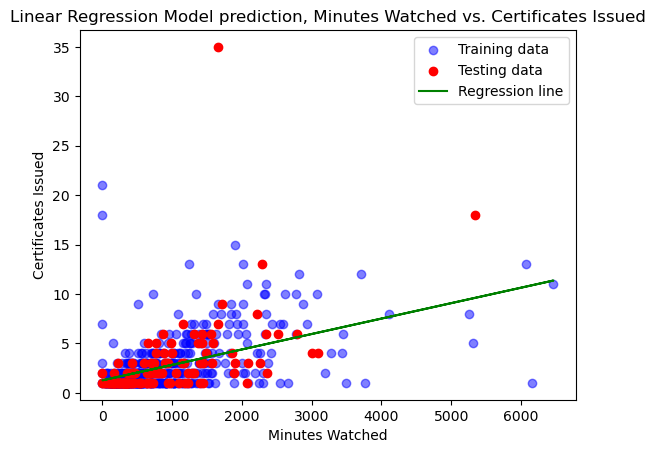

In [13]:
# Scatter plot of the training data
plt.scatter(train_X, train_y, color='blue', label='Training data', alpha = 0.5)

# Scatter plot of the testing data
plt.scatter(test_X, test_y, color='red', label='Testing data')

# Plot the regression line
plt.plot(train_X, linear_model.predict(train_X), color='green', label='Regression line')

# Add labels and title
plt.xlabel('Minutes Watched')
plt.ylabel('Certificates Issued')
plt.title('Linear Regression Model prediction, Minutes Watched vs. Certificates Issued')
plt.legend()

# Show the plot
plt.show()